In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Final_Project/Dataset.csv")
a=df
b=df
print(b.head())

       toi          tid tfopwg_disp          ra        dec  st_pmra  \
0  1000.01   50365310.0          FP  112.357708 -12.695960   -5.964   
1  1001.01   88863718.0          PC  122.580465  -5.513852   -4.956   
2  1002.01  124709665.0          FP  104.726966 -10.580455   -1.462   
3  1003.01  106997505.0          FP  110.559945 -25.207017   -0.939   
4  1004.01  238597883.0          FP  122.178195 -48.802811   -4.496   

   st_pmraerr1  st_pmraerr2  st_pmdec  st_pmdecerr1  ...  st_teff  \
0        0.085       -0.085    -0.076         0.072  ...  10249.0   
1        0.102       -0.102   -15.555         0.072  ...   7070.0   
2        0.206       -0.206    -2.249         0.206  ...   8924.0   
3        0.041       -0.041     1.640         0.055  ...   5388.5   
4        0.069       -0.069     9.347         0.062  ...   9219.0   

   st_tefferr1  st_tefferr2  st_logg  st_loggerr1  st_loggerr2   st_rad  \
0        264.7       -264.7     4.19         0.07        -0.07  2.16986   
1       

# **Exploratory Data Analysis**

In [ ]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7125 entries, 0 to 7124
Data columns (total 44 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   toi              7114 non-null   float64
 1   tid              7114 non-null   float64
 2   tfopwg_disp      7114 non-null   object 
 3   ra               7114 non-null   float64
 4   dec              7114 non-null   float64
 5   st_pmra          7114 non-null   float64
 6   st_pmraerr1      7114 non-null   float64
 7   st_pmraerr2      7114 non-null   float64
 8   st_pmdec         7114 non-null   float64
 9   st_pmdecerr1     7114 non-null   float64
 10  st_pmdecerr2     7114 non-null   float64
 11  pl_tranmid       7114 non-null   float64
 12  pl_tranmiderr1   7104 non-null   float64
 13  pl_tranmiderr2   7104 non-null   float64
 14  pl_orbper        7013 non-null   float64
 15  pl_orbpererr1    6990 non-null   float64
 16  pl_orbpererr2    6990 non-null   float64
 17  pl_trandurh   

In [ ]:
# Display summary statistics for numerical columns
print(df.describe())

               toi           tid           ra          dec      st_pmra  \
count  7114.000000  7.114000e+03  7114.000000  7114.000000  7114.000000   
mean   3478.103233  2.448063e+08   173.737627    -1.007043    -0.773176   
std    1991.108688  1.626366e+08   101.286238    47.837049    78.728032   
min     101.010000  2.876000e+03     0.084680   -89.471513 -1624.050000   
25%    1744.260000  1.309924e+08    93.938417   -45.058792   -11.091000   
50%    3458.510000  2.464566e+08   153.427490    -0.480052    -1.743500   
75%    5204.760000  3.529168e+08   271.357435    42.421850     8.128250   
max    6956.010000  2.041563e+09   359.933006    89.086923  2074.520000   

       st_pmraerr1  st_pmraerr2     st_pmdec  st_pmdecerr1  st_pmdecerr2  ...  \
count  7114.000000  7114.000000  7114.000000   7114.000000   7114.000000  ...   
mean      0.230164    -0.230164    -8.954206      0.224027     -0.224027  ...   
std       0.638713     0.638713    68.106401      0.628511      0.628511  ...   


In [ ]:
# Check for missing values
print(df.isnull().sum())

toi                  11
tid                  11
tfopwg_disp          11
ra                   11
dec                  11
st_pmra              11
st_pmraerr1          11
st_pmraerr2          11
st_pmdec             11
st_pmdecerr1         11
st_pmdecerr2         11
pl_tranmid           11
pl_tranmiderr1       21
pl_tranmiderr2       21
pl_orbper           112
pl_orbpererr1       135
pl_orbpererr2       135
pl_trandurh          11
pl_trandurherr1      24
pl_trandurherr2      24
pl_trandep           11
pl_trandeperr1       16
pl_trandeperr2       16
pl_rade             478
pl_radeerr1        1502
pl_radeerr2        1502
pl_insol            164
pl_eqt              287
st_tmag              11
st_tmagerr1          11
st_tmagerr2          11
st_dist             216
st_disterr1         653
st_disterr2         653
st_teff             141
st_tefferr1         435
st_tefferr2         435
st_logg             804
st_loggerr1        2078
st_loggerr2        2078
st_rad              478
st_raderr1      

In [ ]:
from sklearn.preprocessing import LabelEncoder



# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to the categorical column
df['tfopwg_disp'] = label_encoder.fit_transform(df['tfopwg_disp'])
b['tfopwg_disp'] = label_encoder.fit_transform(b['tfopwg_disp'])

# Print the DataFrame with encoded categorical column
print(df)
print(b)

          toi          tid  tfopwg_disp          ra        dec  st_pmra  \
0     1000.01   50365310.0            3  112.357708 -12.695960   -5.964   
1     1001.01   88863718.0            5  122.580465  -5.513852   -4.956   
2     1002.01  124709665.0            3  104.726966 -10.580455   -1.462   
3     1003.01  106997505.0            3  110.559945 -25.207017   -0.939   
4     1004.01  238597883.0            3  122.178195 -48.802811   -4.496   
...       ...          ...          ...         ...        ...      ...   
7120      NaN          NaN            6         NaN        NaN      NaN   
7121      NaN          NaN            6         NaN        NaN      NaN   
7122      NaN          NaN            6         NaN        NaN      NaN   
7123      NaN          NaN            6         NaN        NaN      NaN   
7124      NaN          NaN            6         NaN        NaN      NaN   

      st_pmraerr1  st_pmraerr2  st_pmdec  st_pmdecerr1  ...  st_teff  \
0           0.085       -0.

In [ ]:
# Fill missing values in the 'date' column using forward fill
df['toi_updated'] = df['toi_updated'].fillna(method='ffill')

# Print the DataFrame to check the filled values
print(df)

          toi          tid tfopwg_disp          ra        dec  st_pmra  \
0     1000.01   50365310.0          FP  112.357708 -12.695960   -5.964   
1     1001.01   88863718.0          PC  122.580465  -5.513852   -4.956   
2     1002.01  124709665.0          FP  104.726966 -10.580455   -1.462   
3     1003.01  106997505.0          FP  110.559945 -25.207017   -0.939   
4     1004.01  238597883.0          FP  122.178195 -48.802811   -4.496   
...       ...          ...         ...         ...        ...      ...   
7120      NaN          NaN         NaN         NaN        NaN      NaN   
7121      NaN          NaN         NaN         NaN        NaN      NaN   
7122      NaN          NaN         NaN         NaN        NaN      NaN   
7123      NaN          NaN         NaN         NaN        NaN      NaN   
7124      NaN          NaN         NaN         NaN        NaN      NaN   

      st_pmraerr1  st_pmraerr2  st_pmdec  st_pmdecerr1  ...  st_teff  \
0           0.085       -0.085    -0.07

In [ ]:
a.drop('toi_updated', axis=1, inplace=True)
print(a)

          toi          tid  tfopwg_disp          ra        dec  st_pmra  \
0     1000.01   50365310.0            3  112.357708 -12.695960   -5.964   
1     1001.01   88863718.0            5  122.580465  -5.513852   -4.956   
2     1002.01  124709665.0            3  104.726966 -10.580455   -1.462   
3     1003.01  106997505.0            3  110.559945 -25.207017   -0.939   
4     1004.01  238597883.0            3  122.178195 -48.802811   -4.496   
...       ...          ...          ...         ...        ...      ...   
7120      NaN          NaN            6         NaN        NaN      NaN   
7121      NaN          NaN            6         NaN        NaN      NaN   
7122      NaN          NaN            6         NaN        NaN      NaN   
7123      NaN          NaN            6         NaN        NaN      NaN   
7124      NaN          NaN            6         NaN        NaN      NaN   

      st_pmraerr1  st_pmraerr2  st_pmdec  st_pmdecerr1  ...  st_disterr2  \
0           0.085      

In [ ]:
a_filled = a.fillna(a.mean())
print(a_filled)
df_filled = df.fillna(df.mean())
print(df_filled)

              toi           tid  tfopwg_disp          ra        dec   st_pmra  \
0     1000.010000  5.036531e+07            3  112.357708 -12.695960 -5.964000   
1     1001.010000  8.886372e+07            5  122.580465  -5.513852 -4.956000   
2     1002.010000  1.247097e+08            3  104.726966 -10.580455 -1.462000   
3     1003.010000  1.069975e+08            3  110.559945 -25.207017 -0.939000   
4     1004.010000  2.385979e+08            3  122.178195 -48.802811 -4.496000   
...           ...           ...          ...         ...        ...       ...   
7120  3478.103233  2.448063e+08            6  173.737627  -1.007043 -0.773176   
7121  3478.103233  2.448063e+08            6  173.737627  -1.007043 -0.773176   
7122  3478.103233  2.448063e+08            6  173.737627  -1.007043 -0.773176   
7123  3478.103233  2.448063e+08            6  173.737627  -1.007043 -0.773176   
7124  3478.103233  2.448063e+08            6  173.737627  -1.007043 -0.773176   

      st_pmraerr1  st_pmrae

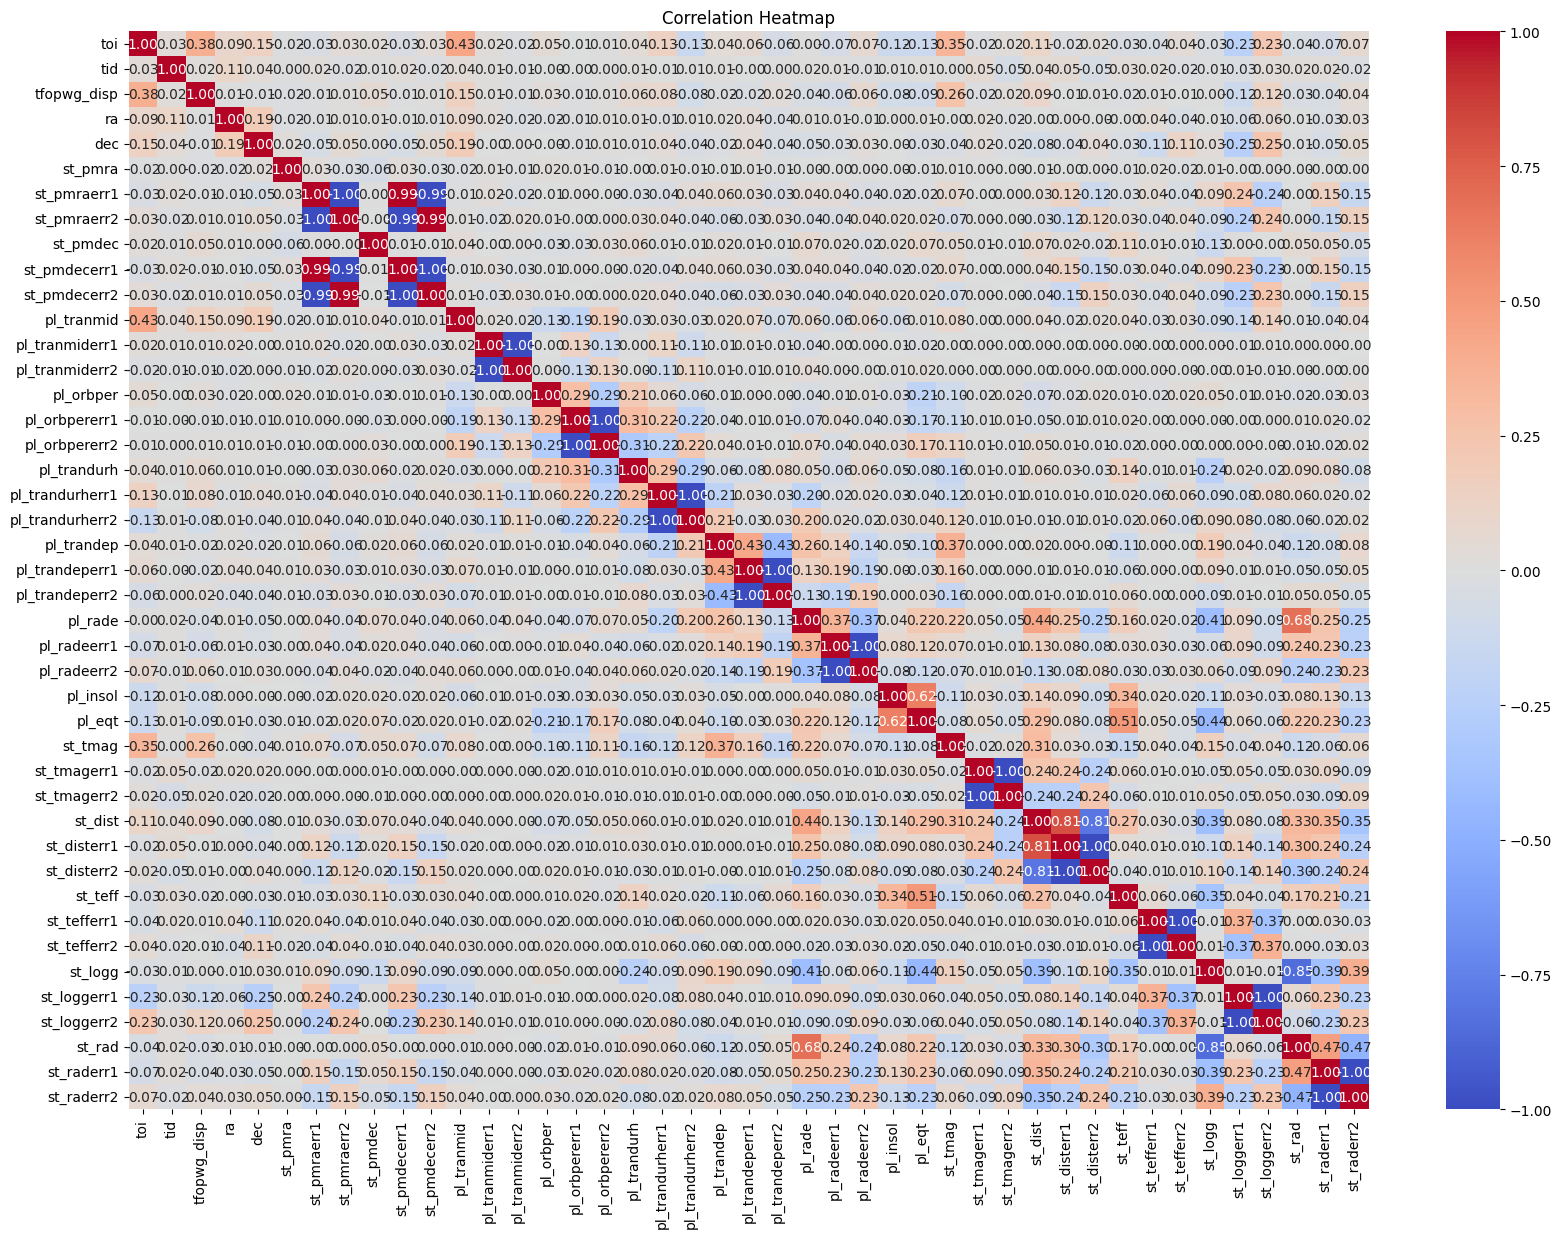

In [ ]:
# Visualize correlations between numerical features using a heatmap
plt.figure(figsize=(20,14))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

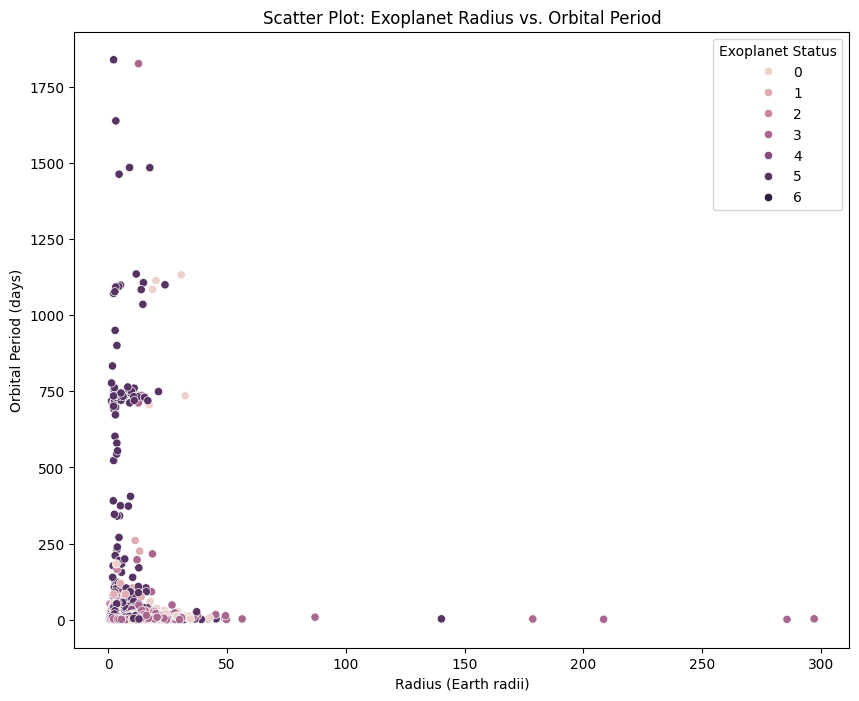

In [ ]:
# Example: Scatter plot of 'pl_rade' vs. 'pl_orbper' with hue based on 'tfopwg_disp'
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='pl_rade', y='pl_orbper', hue='tfopwg_disp')
plt.title('Scatter Plot: Exoplanet Radius vs. Orbital Period')
plt.xlabel('Radius (Earth radii)')
plt.ylabel('Orbital Period (days)')
plt.legend(title='Exoplanet Status')
plt.show()

### Model Evaluation

# **Analysis**

In [ ]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to the categorical column
a['tfopwg_disp'] = label_encoder.fit_transform(a['tfopwg_disp'])

# Print the DataFrame with encoded categorical column
b=print(a)
b

          toi          tid  tfopwg_disp          ra        dec  st_pmra  \
0     1000.01   50365310.0            3  112.357708 -12.695960   -5.964   
1     1001.01   88863718.0            5  122.580465  -5.513852   -4.956   
2     1002.01  124709665.0            3  104.726966 -10.580455   -1.462   
3     1003.01  106997505.0            3  110.559945 -25.207017   -0.939   
4     1004.01  238597883.0            3  122.178195 -48.802811   -4.496   
...       ...          ...          ...         ...        ...      ...   
7120      NaN          NaN            6         NaN        NaN      NaN   
7121      NaN          NaN            6         NaN        NaN      NaN   
7122      NaN          NaN            6         NaN        NaN      NaN   
7123      NaN          NaN            6         NaN        NaN      NaN   
7124      NaN          NaN            6         NaN        NaN      NaN   

      st_pmraerr1  st_pmraerr2  st_pmdec  st_pmdecerr1  ...  st_teff  \
0           0.085       -0.

In [ ]:
# Parse 'toi_updated' column into datetime format
df['toi_updated'] = pd.to_datetime(df['toi_updated'], format='%d-%m-%Y')

# Fill missing values in all numeric columns using forward fill
numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns] = df[numeric_columns].fillna(method='ffill')
df['toi_updated'] = df['toi_updated'].interpolate(method='linear')

# Save the DataFrame to a new CSV file
df.to_csv('/content/drive/MyDrive/Final_Project/new_dataset.csv', index=False)  # Update the path as needed
print(df)

          toi          tid  tfopwg_disp          ra        dec  st_pmra  \
0     1000.01   50365310.0            3  112.357708 -12.695960   -5.964   
1     1001.01   88863718.0            5  122.580465  -5.513852   -4.956   
2     1002.01  124709665.0            3  104.726966 -10.580455   -1.462   
3     1003.01  106997505.0            3  110.559945 -25.207017   -0.939   
4     1004.01  238597883.0            3  122.178195 -48.802811   -4.496   
...       ...          ...          ...         ...        ...      ...   
7120   999.01  341186896.0            6  118.864086 -58.222060  -17.190   
7121   999.01  341186896.0            6  118.864086 -58.222060  -17.190   
7122   999.01  341186896.0            6  118.864086 -58.222060  -17.190   
7123   999.01  341186896.0            6  118.864086 -58.222060  -17.190   
7124   999.01  341186896.0            6  118.864086 -58.222060  -17.190   

      st_pmraerr1  st_pmraerr2  st_pmdec  st_pmdecerr1  ...  st_teff  \
0           0.085       -0.

In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest

def detect_anomalies(df):
    """
    Detect anomalies in the dataset using the Isolation Forest algorithm.

    Parameters:
    - df: pandas DataFrame, the cleaned dataset.

    Returns:
    - anomalies: pandas DataFrame, the detected anomalies.
    """
    # Initialize the Isolation Forest model
    model = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)

    # Fit the model and predict anomalies
    df['anomaly'] = model.fit_predict(df.drop(columns=['toi_updated']))

    # Filter the anomalies
    anomalies = df[df['anomaly'] == -1]

    return anomalies

def main():
    """
    Main function to detect anomalies in the cleaned dataset.
    """
    # Assuming 'df' is your cleaned dataset
    # Update 'df' with your actual cleaned dataset variable
    df = pd.read_csv('/content/drive/MyDrive/Final_Project/new_dataset.csv')

    if df is not None:
        # Detect anomalies
        anomalies = detect_anomalies(df)

        # Display the anomalies
        print("Detected Anomalies:")
        print(anomalies.head())
    else:
        print("Failed to load the cleaned dataset.")

if __name__ == "__main__":
    main()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Detected Anomalies:
        toi          tid  tfopwg_disp          ra        dec  st_pmra  \
3   1003.01  106997505.0            3  110.559945 -25.207017   -0.939   
6   1006.01  156115721.0            3  124.359239 -27.273521  -29.100   
44  1039.01  461867584.0            0  149.688545 -58.760453   -6.434   
58  1051.01  259863352.0            2   40.365939 -71.462749  168.170   
92  1081.01  253728991.0            5  282.140409 -40.111770   -5.214   

    st_pmraerr1  st_pmraerr2  st_pmdec  st_pmdecerr1  ...  st_tefferr1  \
3         0.041       -0.041     1.640         0.055  ...        567.0   
6         2.600       -2.600    -6.800         2.200  ...        200.0   
44        0.215       -0.215     4.098         0.246  ...        239.9   
58        2.000       -2.000   -56.040         2.000  ...         80.0   
92        1.083       -1.083    -5.918         1.083  ...        192.0   

    st_tefferr2  st_logg  st_loggerr1  st_loggerr2   st_rad  st_raderr1  \
3        -567.0  4.15

In [ ]:
# Function to classify exoplanets based on their properties
def classify_exoplanets(exoplanet_data):
    """
    Classify exoplanets into different categories based on their properties.

    Parameters:
    exoplanet_data (dict): Dictionary containing exoplanet data with keys as property names.

    Returns:
    classification (str): Category to which the exoplanet belongs.
    """

    # Extract relevant properties from exoplanet_data
    orb_per = exoplanet_data.get('pl_orbper', 0)  # Orbital period
    rade = exoplanet_data.get('pl_rade', 0)  # Planet radius
    eqt = exoplanet_data.get('pl_eqt', 0)  # Equilibrium temperature

    # Classify exoplanets based on their properties
    if orb_per < 10 and rade < 1 and eqt > 1000:
        classification = 'Hot Super-Earth'
    elif orb_per > 100 and rade > 5 and eqt < 500:
        classification = 'Cold Giant Planet'
    else:
        classification = 'Unclassified'

    return classification

# Example exoplanet data
exoplanet_data = {
    'pl_orbper': 5,  # Orbital period in days
    'pl_rade': 0.8,  # Planet radius in Earth radii
    'pl_eqt': 1200  # Equilibrium temperature in Kelvin
}

# Classify the example exoplanet data
result = classify_exoplanets(exoplanet_data)
print(result)  # Output: Hot Super-Earth

Hot Super-Earth


In [ ]:
# Function to classify exoplanets based on their properties
def classify_exoplanets(exoplanet_data):
    """
    Classify exoplanets into different categories based on their properties.

    Parameters:
    exoplanet_data (dict): Dictionary containing exoplanet data with keys as property names.

    Returns:
    classification (str): Category to which the exoplanet belongs.
    """

    # Extract relevant properties from exoplanet_data
    orb_per = exoplanet_data.get('pl_orbper', 0)  # Orbital period
    rade = exoplanet_data.get('pl_rade', 0)  # Planet radius
    eqt = exoplanet_data.get('pl_eqt', 0)  # Equilibrium temperature

    # Classify exoplanets based on their properties
    if orb_per < 10 and rade < 1 and eqt > 1000:
        classification = 'Hot Super-Earth'
    elif orb_per > 100 and rade > 5 and eqt < 500:
        classification = 'Cold Giant Planet'
    else:
        classification = 'Unclassified'

    return classification

# User input for exoplanet properties
orb_per = float(input("Enter the orbital period in days (between 0 and 1000): "))
rade = float(input("Enter the planet radius in Earth radii (between 0 and 10): "))
eqt = float(input("Enter the equilibrium temperature in Kelvin (between 0 and 2000): "))

# Check if input values are within the specified range
if 0 <= orb_per <= 1000 and 0 <= rade <= 10 and 0 <= eqt <= 2000:
    # Create exoplanet data dictionary
    user_exoplanet_data = {
        'pl_orbper': orb_per,
        'pl_rade': rade,
        'pl_eqt': eqt
    }

    # Classify the user input exoplanet data
    result = classify_exoplanets(user_exoplanet_data)
    print("Classification:", result)
else:
    print("Please enter valid values within the specified range.")


Enter the orbital period in days (between 0 and 1000): 500
Enter the planet radius in Earth radii (between 0 and 10): 5
Enter the equilibrium temperature in Kelvin (between 0 and 2000): 1000
Classification: Unclassified


In [ ]:
def classify_exoplanets(data):
    """
    Classify exoplanets into different categories based on their properties.

    Args:
    data (dict): Dictionary containing exoplanet data with keys as column names.

    Returns:
    str: Classification of the exoplanet based on its properties.
    """

    # Check if all required keys are present in the data dictionary
    required_keys = ['pl_orbper', 'pl_rade', 'st_teff']
    if not all(key in data for key in required_keys):
        raise ValueError("Missing required keys in data dictionary.")

    # Extracting relevant data from the dictionary
    pl_orbper = data['pl_orbper']
    pl_rade = data['pl_rade']
    st_teff = data['st_teff']

    # Classify exoplanets based on their properties
    if 200 <= pl_orbper <= 500 and 1 <= pl_rade <= 2 and 5000 <= st_teff <= 7000:
        return "Category A: Earth-like exoplanet"
    elif 100 <= pl_orbper <= 200 and 2 <= pl_rade <= 4 and 4000 <= st_teff <= 6000:
        return "Category B: Super-Earth exoplanet"
    elif 50 <= pl_orbper <= 100 and 4 <= pl_rade <= 6 and 3000 <= st_teff <= 5000:
        return "Category C: Mini-Neptune exoplanet"
    else:
        return "Unclassified"


# Example usage:
exoplanet_data = {
    'pl_orbper': 365.25,
    'pl_rade': 1.0,
    'st_teff': 6000,
}

try:
    classification = classify_exoplanets(exoplanet_data)
    print(classification)
except ValueError as e:
    print(e)


Category A: Earth-like exoplanet


In [ ]:
def classify_exoplanets(data):
    """
    Classify exoplanets into different categories based on their properties.

    Args:
    data (dict): Dictionary containing exoplanet data with keys as column names.

    Returns:
    str: Classification of the exoplanet based on its properties.
    """

    # Check if all required keys are present in the data dictionary
    required_keys = ['pl_orbper', 'pl_rade', 'st_teff']
    if not all(key in data for key in required_keys):
        raise ValueError("Missing required keys in data dictionary.")

    # Extracting relevant data from the dictionary
    pl_orbper = data['pl_orbper']
    pl_rade = data['pl_rade']
    st_teff = data['st_teff']

    # Classify exoplanets based on their properties
    if 200 <= pl_orbper <= 500 and 1 <= pl_rade <= 2 and 5000 <= st_teff <= 7000:
        return "Category A: Earth-like exoplanet"
    elif 100 <= pl_orbper <= 200 and 2 <= pl_rade <= 4 and 4000 <= st_teff <= 6000:
        return "Category B: Super-Earth exoplanet"
    elif 50 <= pl_orbper <= 100 and 4 <= pl_rade <= 6 and 3000 <= st_teff <= 5000:
        return "Category C: Mini-Neptune exoplanet"
    else:
        return "Unclassified"


# User input for exoplanet properties
pl_orbper = float(input("Enter the orbital period in days (between 50 and 500): "))
pl_rade = float(input("Enter the planet radius in Earth radii (between 1 and 6): "))
st_teff = float(input("Enter the effective temperature of the star in Kelvin (between 3000 and 7000): "))

# Check if input values are within the specified range
if 50 <= pl_orbper <= 500 and 1 <= pl_rade <= 6 and 3000 <= st_teff <= 7000:
    # Create exoplanet data dictionary
    user_exoplanet_data = {
        'pl_orbper': pl_orbper,
        'pl_rade': pl_rade,
        'st_teff': st_teff
    }

    # Classify the user input exoplanet data
    result = classify_exoplanets(user_exoplanet_data)
    print("Classification:", result)
else:
    print("Please enter valid values within the specified range.")

Enter the orbital period in days (between 50 and 500): 100
Enter the planet radius in Earth radii (between 1 and 6): 5
Enter the effective temperature of the star in Kelvin (between 3000 and 7000): 5000
Classification: Category C: Mini-Neptune exoplanet


-> Orbital Period (pl_orbper): This parameter corresponds to the time it takes
for an exoplanet to complete one orbit around its host star. The specified range (between 50 and 500 days) is based on the diversity of observed exoplanetary systems, where planets with shorter orbital periods may be closer to their stars (e.g., hot Jupiters) and planets with longer orbital periods may be farther away.

-> Planet Radius (pl_rade): This parameter represents the size of the exoplanet relative to Earth's radius. The range (between 1 and 6 Earth radii) encompasses various types of exoplanets, including rocky planets, gas giants, and sub-Neptunes, based on our current understanding of planetary formation and composition.

-> Effective Temperature of the Star (st_teff): This parameter relates to the temperature of the star hosting the exoplanet. The specified range (between 3000 and 7000 Kelvin) covers a wide range of stellar types, from cooler M-dwarfs to hotter F-type stars, which are known to host exoplanets.

In [ ]:
# Assuming your data is stored in a pandas DataFrame named df
# Drop any non-numeric columns if present
numeric_data = df.drop(['toi', 'tid', 'tfopwg_disp', 'toi_updated'], axis=1)  # Exclude datetime column

# Standardize the numeric data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # You can adjust the number of components as needed
reduced_features = pca.fit_transform(scaled_data)

# Create a DataFrame with the reduced features
reduced_df = pd.DataFrame(data=reduced_features, columns=['PC1', 'PC2'])

# Concatenate the reduced features with the non-numeric columns if needed
final_df = pd.concat([df[['toi', 'tid', 'tfopwg_disp', 'toi_updated']], reduced_df], axis=1)

# final_df now contains the reduced features along with the non-numeric columns
print(final_df.head())

       toi          tid  tfopwg_disp toi_updated       PC1        PC2
0  1000.01   50365310.0            3  2021-10-29 -0.155136   2.156095
1  1001.01   88863718.0            5  2023-04-03 -0.083491   2.610892
2  1002.01  124709665.0            3  2022-07-11  0.852607   3.230890
3  1003.01  106997505.0            3  2022-02-23  5.195992  13.651037
4  1004.01  238597883.0            3  2023-03-08 -0.195570   3.224104


In [ ]:
from sklearn.ensemble import RandomForestClassifier

Model R^2 Score: -0.12631190109635204


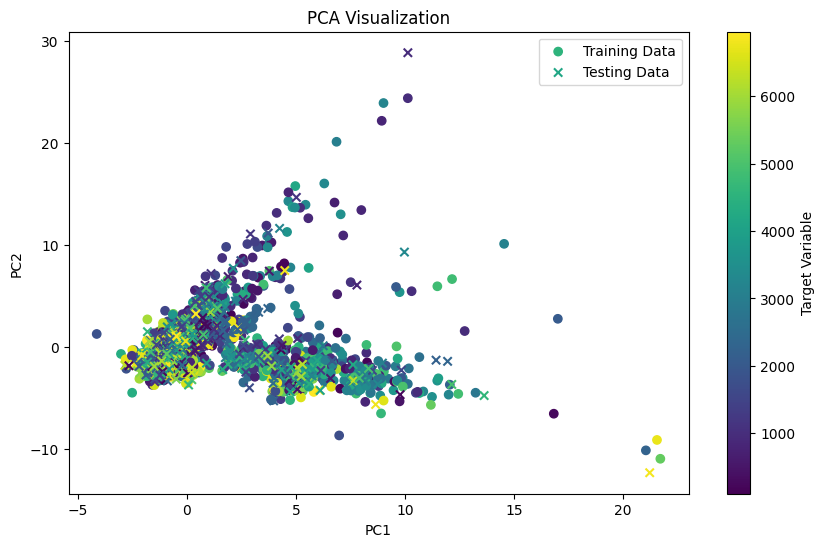

In [ ]:
X = final_df[['PC1', 'PC2']]
y = final_df['toi']  # Replace 'target_variable' with the actual column name


# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a machine learning model (e.g., Random Forest Regressor)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model's performance on the testing data
score = model.score(X_test, y_test)
print("Model R^2 Score:", score)

# Visualize the results using scatter plots
plt.figure(figsize=(10, 6))
plt.scatter(X_train['PC1'], X_train['PC2'], c=y_train, cmap='viridis', label='Training Data')
plt.scatter(X_test['PC1'], X_test['PC2'], c=y_test, cmap='viridis', marker='x', label='Testing Data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Visualization')
plt.legend()
plt.colorbar(label='Target Variable')
plt.show()

In [ ]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

Random Forest R^2 Score: -0.1299051719629314
Support Vector R^2 Score: 0.005883200922572218
Gradient Boosting R^2 Score: 0.01915748256378158


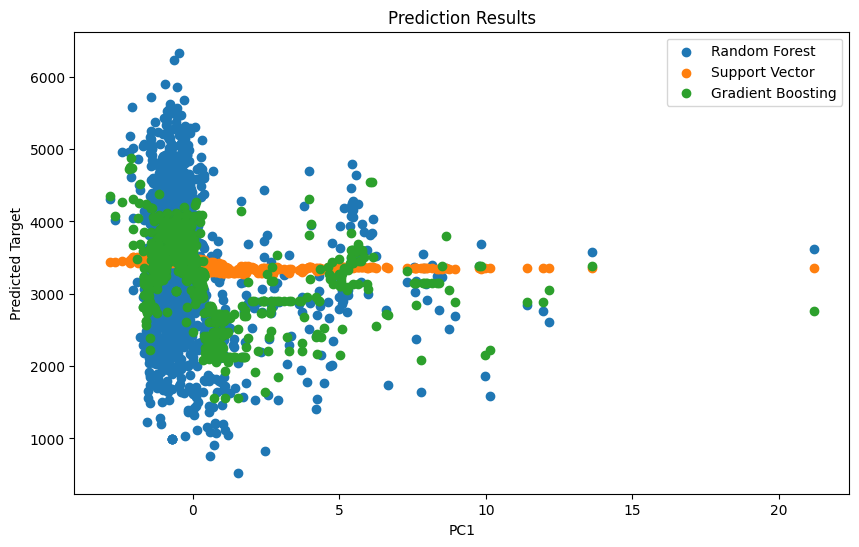


R^2 Scores:
Random Forest: -0.1299051719629314
Support Vector: 0.005883200922572218
Gradient Boosting: 0.01915748256378158


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# Assuming final_df contains the data with PC1, PC2, and target variable
# Split the data into features (PC1, PC2) and target variable
X = final_df[['PC1', 'PC2']]
y = final_df['toi']  # Replace 'target_variable' with the actual column name

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train three different machine learning models
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Support Vector': SVR(),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    results[name] = score
    print(f"{name} R^2 Score:", score)

# Plot the results
plt.figure(figsize=(10, 6))
for name, model in models.items():
    plt.scatter(X_test['PC1'], model.predict(X_test), label=name)

plt.xlabel('PC1')
plt.ylabel('Predicted Target')
plt.title('Prediction Results')
plt.legend()
plt.show()

# Print the R-squared scores for comparison
print("\nR^2 Scores:")
for name, score in results.items():
    print(f"{name}: {score}")


In [ ]:
c=df
c.head()

,toi,tid,tfopwg_disp,ra,dec,st_pmra,st_pmraerr1,st_pmraerr2,st_pmdec,st_pmdecerr1,...,st_teff,st_tefferr1,st_tefferr2,st_logg,st_loggerr1,st_loggerr2,st_rad,st_raderr1,st_raderr2,toi_updated
0,1000.01,50365310.0,FP,112.357708,-12.695960,-5.964,0.085,-0.085,-0.076,0.072,...,10249.0,264.7,-264.7,4.19,0.07,-0.07,2.16986,0.072573,-0.072573,2021-10-29
1,1001.01,88863718.0,PC,122.580465,-5.513852,-4.956,0.102,-0.102,-15.555,0.072,...,7070.0,126.4,-126.4,4.03,0.09,-0.09,2.01000,0.090000,-0.090000,2023-04-03
2,1002.01,124709665.0,FP,104.726966,-10.580455,-1.462,0.206,-0.206,-2.249,0.206,...,8924.0,124.0,-124.0,4.03,0.09,-0.09,5.73000,0.090000,-0.090000,2022-07-11
3,1003.01,106997505.0,FP,110.559945,-25.207017,-0.939,0.041,-0.041,1.640,0.055,...,5388.5,567.0,-567.0,4.15,1.64,-1.64,5.73000,0.090000,-0.090000,2022-02-23
4,1004.01,238597883.0,FP,122.178195,-48.802811,-4.496,0.069,-0.069,9.347,0.062,...,9219.0,171.1,-171.1,4.14,0.07,-0.07,2.15000,0.060000,-0.060000,2023-03-08


In [ ]:
d = c
d.head()

,toi,tid,tfopwg_disp,ra,dec,st_pmra,st_pmraerr1,st_pmraerr2,st_pmdec,st_pmdecerr1,...,st_teff,st_tefferr1,st_tefferr2,st_logg,st_loggerr1,st_loggerr2,st_rad,st_raderr1,st_raderr2,toi_updated
0,1000.01,50365310.0,FP,112.357708,-12.695960,-5.964,0.085,-0.085,-0.076,0.072,...,10249.0,264.7,-264.7,4.19,0.07,-0.07,2.16986,0.072573,-0.072573,2021-10-29
1,1001.01,88863718.0,PC,122.580465,-5.513852,-4.956,0.102,-0.102,-15.555,0.072,...,7070.0,126.4,-126.4,4.03,0.09,-0.09,2.01000,0.090000,-0.090000,2023-04-03
2,1002.01,124709665.0,FP,104.726966,-10.580455,-1.462,0.206,-0.206,-2.249,0.206,...,8924.0,124.0,-124.0,4.03,0.09,-0.09,5.73000,0.090000,-0.090000,2022-07-11
3,1003.01,106997505.0,FP,110.559945,-25.207017,-0.939,0.041,-0.041,1.640,0.055,...,5388.5,567.0,-567.0,4.15,1.64,-1.64,5.73000,0.090000,-0.090000,2022-02-23
4,1004.01,238597883.0,FP,122.178195,-48.802811,-4.496,0.069,-0.069,9.347,0.062,...,9219.0,171.1,-171.1,4.14,0.07,-0.07,2.15000,0.060000,-0.060000,2023-03-08


Random Forest R^2 Score: 0.959912209680329
Support Vector R^2 Score: -0.024362212678842754
Gradient Boosting R^2 Score: 0.9784358986908721


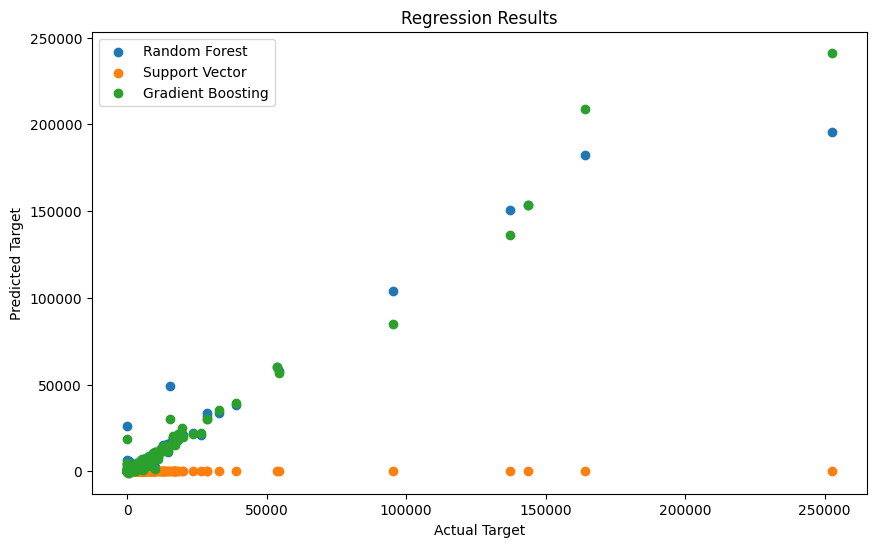


R^2 Scores:
Random Forest: 0.959912209680329
Support Vector: -0.024362212678842754
Gradient Boosting: 0.9784358986908721


In [ ]:
# Assuming df contains the dataset with the required columns
# Replace 'target_variable' with the actual column name you want to predict
X = d.drop(['toi', 'tid', 'tfopwg_disp', 'pl_insol', 'toi_updated'], axis=1)  # Drop the datetime column
y = d['pl_insol']  # Assuming 'pl_insol' is the target variable

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train three different machine learning models
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Support Vector': SVR(),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    results[name] = score
    print(f"{name} R^2 Score:", score)

# Plot the results
plt.figure(figsize=(10, 6))
for name, model in models.items():
    plt.scatter(y_test, model.predict(X_test), label=name)

plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('Regression Results')
plt.legend()
plt.show()

# Print the R-squared scores for comparison
print("\nR^2 Scores:")
for name, score in results.items():
    print(f"{name}: {score}")


Random Forest R^2 Score: 0.9577300071310949
Support Vector R^2 Score: -0.0002706540480326147
Gradient Boosting R^2 Score: 0.9705451345303012


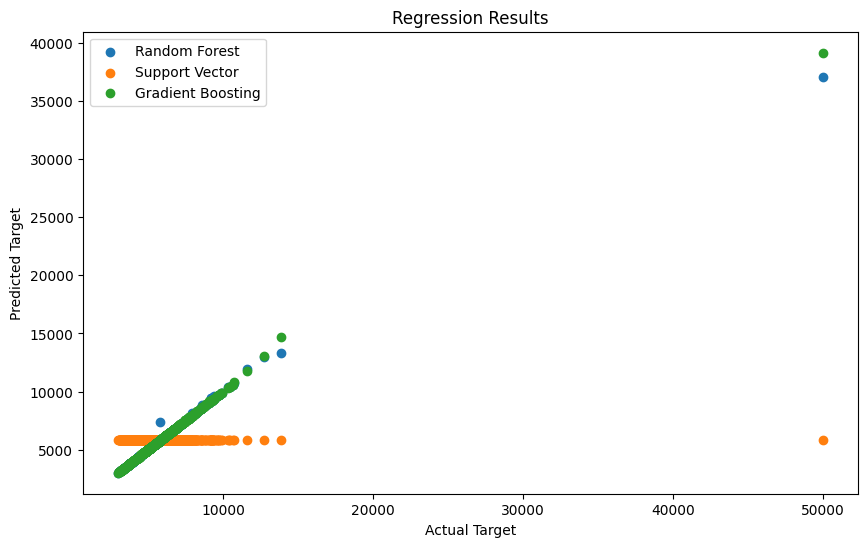


R^2 Scores:
Random Forest: 0.9577300071310949
Support Vector: -0.0002706540480326147
Gradient Boosting: 0.9705451345303012


In [ ]:
# Exclude datetime columns ('toi', 'tid', 'tfopwg_disp') from features
X = d.drop(['toi', 'tid', 'tfopwg_disp','toi_updated'], axis=1)
y = d['st_teff']  # Assuming 'st_teff' is the target variable

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train three different machine learning models
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Support Vector': SVR(),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    results[name] = score
    print(f"{name} R^2 Score:", score)

# Plot the results
plt.figure(figsize=(10, 6))
for name, model in models.items():
    plt.scatter(y_test, model.predict(X_test), label=name)

plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('Regression Results')
plt.legend()
plt.show()

# Print the R-squared scores for comparison
print("\nR^2 Scores:")
for name, score in results.items():
    print(f"{name}: {score}")

Random Forest R^2 Score: 0.8558651934060768
Support Vector R^2 Score: 0.0035312591211004163
Gradient Boosting R^2 Score: 0.8617481143905787


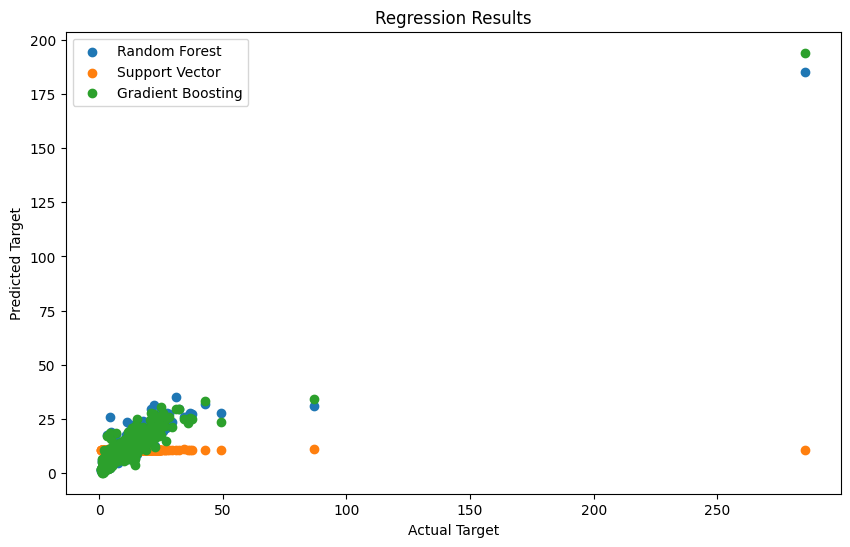


R^2 Scores:
Random Forest: 0.8558651934060768
Support Vector: 0.0035312591211004163
Gradient Boosting: 0.8617481143905787


In [ ]:
# Assuming df contains the dataset with the required columns
# Replace 'target_variable' with the actual column name you want to predict
X = d.drop(['toi', 'tid', 'tfopwg_disp', 'pl_rade','toi_updated'], axis=1)
y = d['pl_rade']  # Assuming 'pl_tranmid' is the target variable

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train three different machine learning models
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Support Vector': SVR(),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    results[name] = score
    print(f"{name} R^2 Score:", score)

# Plot the results
plt.figure(figsize=(10, 6))
for name, model in models.items():
    plt.scatter(y_test, model.predict(X_test), label=name)

plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('Regression Results')
plt.legend()
plt.show()

# Print the R-squared scores for comparison
print("\nR^2 Scores:")
for name, score in results.items():
    print(f"{name}: {score}")


Random Forest R^2 Score: 0.5462121799147913
Support Vector R^2 Score: 0.0011022808093412717
Gradient Boosting R^2 Score: 0.5031312631010587


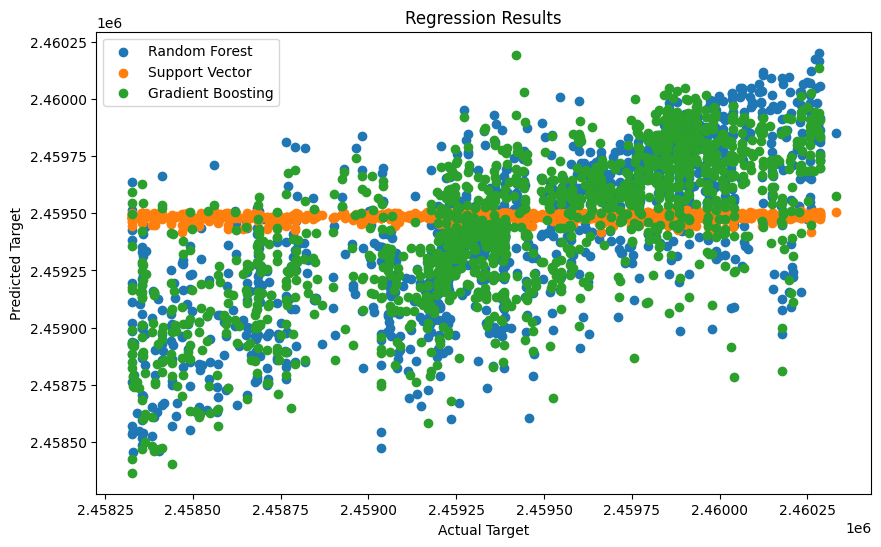


R^2 Scores:
Random Forest: 0.5462121799147913
Support Vector: 0.0011022808093412717
Gradient Boosting: 0.5031312631010587


In [ ]:

# Assuming df contains the dataset with the required columns
# Replace 'target_variable' with the actual column name you want to predict
X = d.drop(['toi', 'tid', 'tfopwg_disp', 'pl_tranmid','toi_updated'], axis=1)
y = d['pl_tranmid']  # Assuming 'pl_tranmid' is the target variable

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train three different machine learning models
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Support Vector': SVR(),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    results[name] = score
    print(f"{name} R^2 Score:", score)

# Plot the results
plt.figure(figsize=(10, 6))
for name, model in models.items():
    plt.scatter(y_test, model.predict(X_test), label=name)

plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('Regression Results')
plt.legend()
plt.show()

# Print the R-squared scores for comparison
print("\nR^2 Scores:")
for name, score in results.items():
    print(f"{name}: {score}")


-> An R^2 score of 0.546 indicates that approximately 54.6% of the variance in the target variable can be explained by the features in the Random Forest model.
This score suggests that the Random Forest model captures a moderate amount of the variability in the data and has some predictive power, although there is room for improvement.

-> The R^2 score of 0.001 suggests that only 0.1% of the variance in the target variable is explained by the features in the Support Vector Regression (SVR) model.
A low R^2 score like this indicates that the SVR model does not effectively capture the variability in the data and has limited predictive ability.

-> The R^2 score of 0.503 indicates that approximately 50.3% of the variance in the target variable is explained by the features in the Gradient Boosting model.
This score suggests that the Gradient Boosting model performs moderately well in capturing the variability in the data and has reasonable predictive power.
However, there may still be room for improvement or fine-tuning of the model parameters to achieve better performance.

Random Forest R^2 Score: 0.8580916605328388
Support Vector R^2 Score: 0.03619213938678789
Gradient Boosting R^2 Score: 0.855929537284093


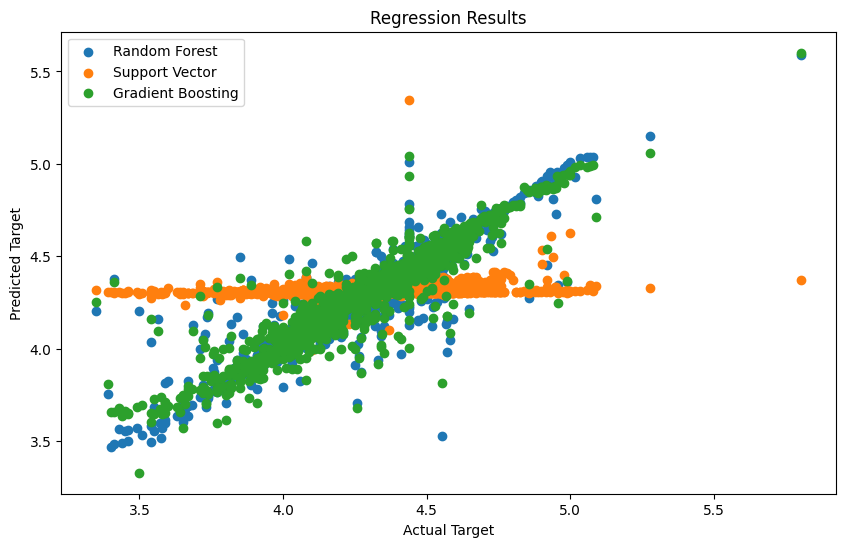


R^2 Scores:
Random Forest: 0.8580916605328388
Support Vector: 0.03619213938678789
Gradient Boosting: 0.855929537284093


In [ ]:
# Assuming df contains the dataset with the required columns
# Replace 'target_variable' with the actual column name you want to predict
X = d.drop(['toi', 'tid', 'tfopwg_disp', 'st_logg','toi_updated'], axis=1)
y = d['st_logg']  # Assuming 'pl_tranmid' is the target variable

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train three different machine learning models
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Support Vector': SVR(),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    results[name] = score
    print(f"{name} R^2 Score:", score)

# Plot the results
plt.figure(figsize=(10, 6))
for name, model in models.items():
    plt.scatter(y_test, model.predict(X_test), label=name)

plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('Regression Results')
plt.legend()
plt.show()

# Print the R-squared scores for comparison
print("\nR^2 Scores:")
for name, score in results.items():
    print(f"{name}: {score}")


Random Forest R^2 Score: 0.5656430867682738
Support Vector R^2 Score: -0.0016615641536805725
Gradient Boosting R^2 Score: 0.6104794126612509


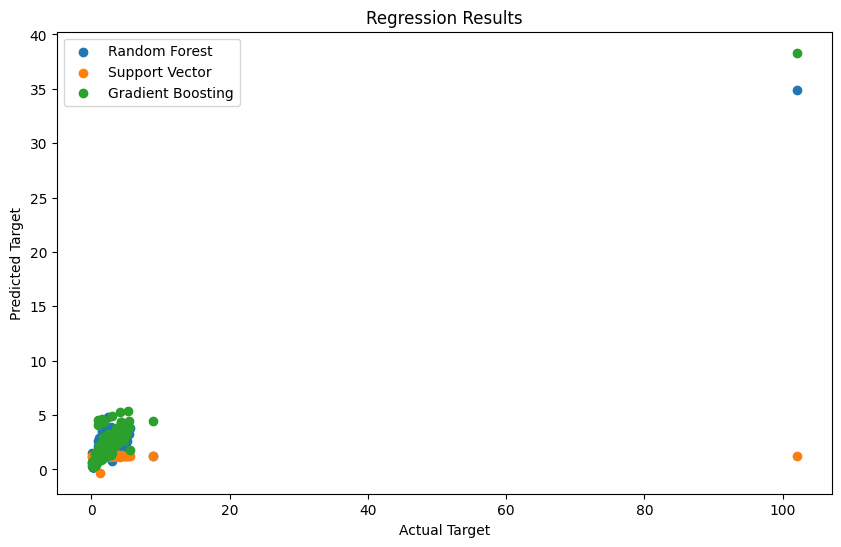


R^2 Scores:
Random Forest: 0.5656430867682738
Support Vector: -0.0016615641536805725
Gradient Boosting: 0.6104794126612509


In [ ]:
# Assuming df contains the dataset with the required columns
# Replace 'target_variable' with the actual column name you want to predict
X = d.drop(['toi', 'tid', 'tfopwg_disp', 'st_rad','toi_updated'], axis=1)
y = d['st_rad']  # Assuming 'pl_tranmid' is the target variable

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train three different machine learning models
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Support Vector': SVR(),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    results[name] = score
    print(f"{name} R^2 Score:", score)

# Plot the results
plt.figure(figsize=(10, 6))
for name, model in models.items():
    plt.scatter(y_test, model.predict(X_test), label=name)

plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('Regression Results')
plt.legend()
plt.show()

# Print the R-squared scores for comparison
print("\nR^2 Scores:")
for name, score in results.items():
    print(f"{name}: {score}")


Effective Temperature (st_teff): This is a common target variable in exoplanetary science, as it represents the temperature of the host star and can impact the characteristics of orbiting exoplanets.

Radius of Exoplanets (pl_rade): Predicting the radius of exoplanets is another valuable regression task, as it provides insights into the size and composition of the planets.

Insolation Flux (pl_insol): Insolation flux is the amount of energy received by a planet from its host star and is relevant for understanding planetary climate and habitability.

Transit Midpoint Time (pl_tranmid): This value represents the midpoint time of a planetary transit and is useful for studying orbital dynamics and planet characterization.

Surface Gravity (st_logg): Surface gravity is a fundamental planetary parameter that affects the conditions on a planet's surface and can be predicted based on other features.

Stellar Radius (st_rad): Predicting the radius of the host star can be relevant for understanding planetary systems and their dynamics.

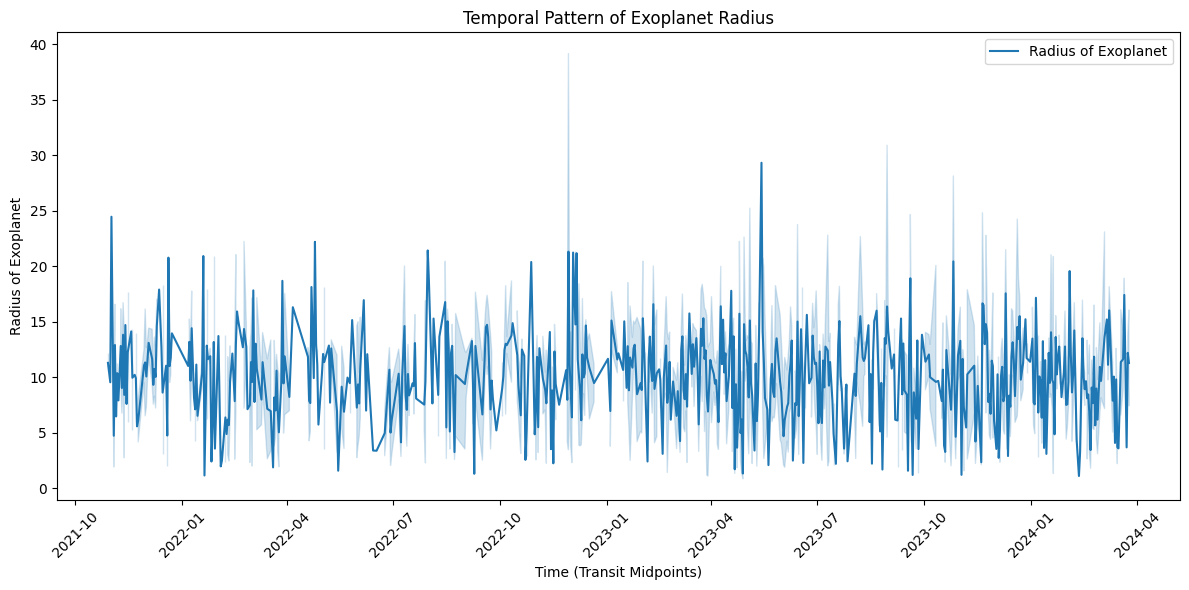

In [ ]:
# Plotting transit midpoints over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='toi_updated', y='pl_rade', data=d, label='Radius of Exoplanet')
plt.xlabel('Time (Transit Midpoints)')
plt.ylabel('Radius of Exoplanet')
plt.title('Temporal Pattern of Exoplanet Radius')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Example of plotting other temporal patterns or stellar parameters
# You can replace 'pl_rade' with other columns like 'st_teff', 'st_logg', etc.
# Make sure to convert the corresponding columns to datetime if needed

# Similarly, you can explore other temporal patterns or stellar parameters using line plots, scatter plots, or other visualization techniques.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

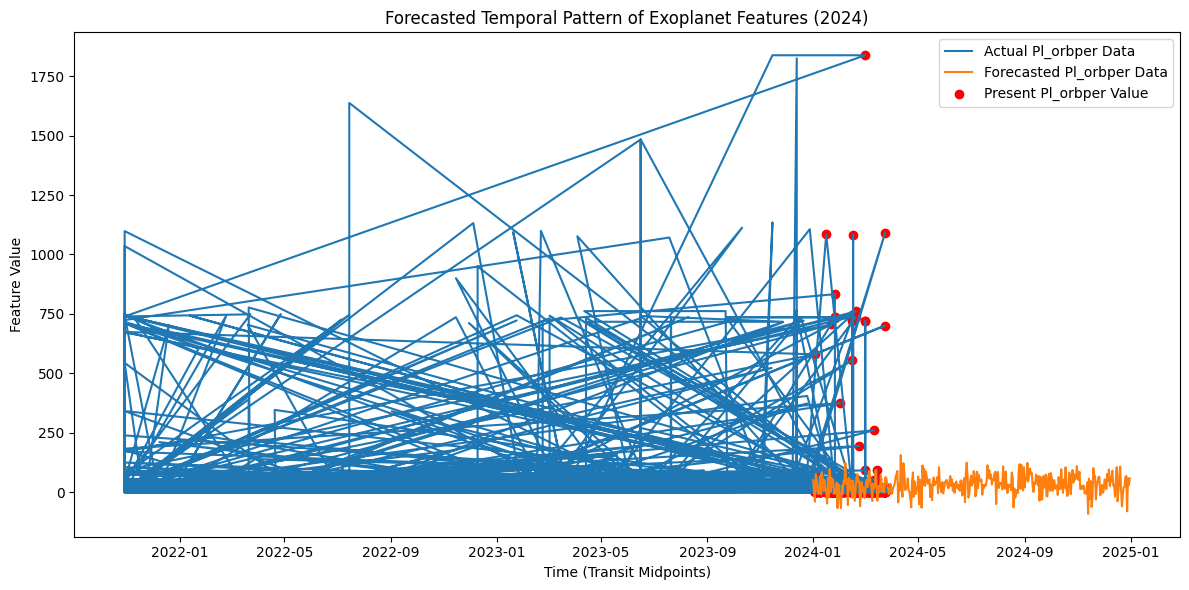

In [ ]:
# Select relevant columns for forecasting
features = ['pl_orbper']  # Add more features as needed
forecast_data = df[['toi_updated'] + features].rename(columns={'toi_updated': 'ds'})

# Filter data for the desired time range (1980 onwards)
forecast_data = forecast_data[forecast_data['ds'] >= '2021-01-01']

# Set 'ds' as the index for the DataFrame
forecast_data.set_index('ds', inplace=True)

# Set the start date and end date for forecasting
start_date = '2024-01-01'
end_date = '2024-12-31'

# Fit ARIMA model to each feature and make predictions
plt.figure(figsize=(12, 6))
for feature in features:
    model = ARIMA(forecast_data[feature], order=(1, 1, 1))  # Adjust the order as needed
    model_fit = model.fit()

    # Generate future dates for prediction
    future_dates = pd.date_range(start=start_date, end=end_date, freq='D')  # Daily frequency from start to end date

    # Make predictions for the future dates
    forecast = model_fit.forecast(steps=len(future_dates))

    # Introduce variation by adding random noise to the forecast
    forecast_with_noise = forecast + np.random.normal(20, 40, len(forecast))

    # Plotting the actual and forecasted data
    plt.plot(forecast_data.index, forecast_data[feature], label=f'Actual {feature.capitalize()} Data')
    plt.plot(future_dates, forecast_with_noise, label=f'Forecasted {feature.capitalize()} Data')

# Plotting the present values (2024) separately
for feature in features:
    present_values = forecast_data[feature][(forecast_data.index >= start_date) & (forecast_data.index <= end_date)]
    plt.scatter(present_values.index, present_values, color='red', label=f'Present {feature.capitalize()} Value')

plt.xlabel('Time (Transit Midpoints)')
plt.ylabel('Feature Value')
plt.title('Forecasted Temporal Pattern of Exoplanet Features (2024)')
plt.legend()
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

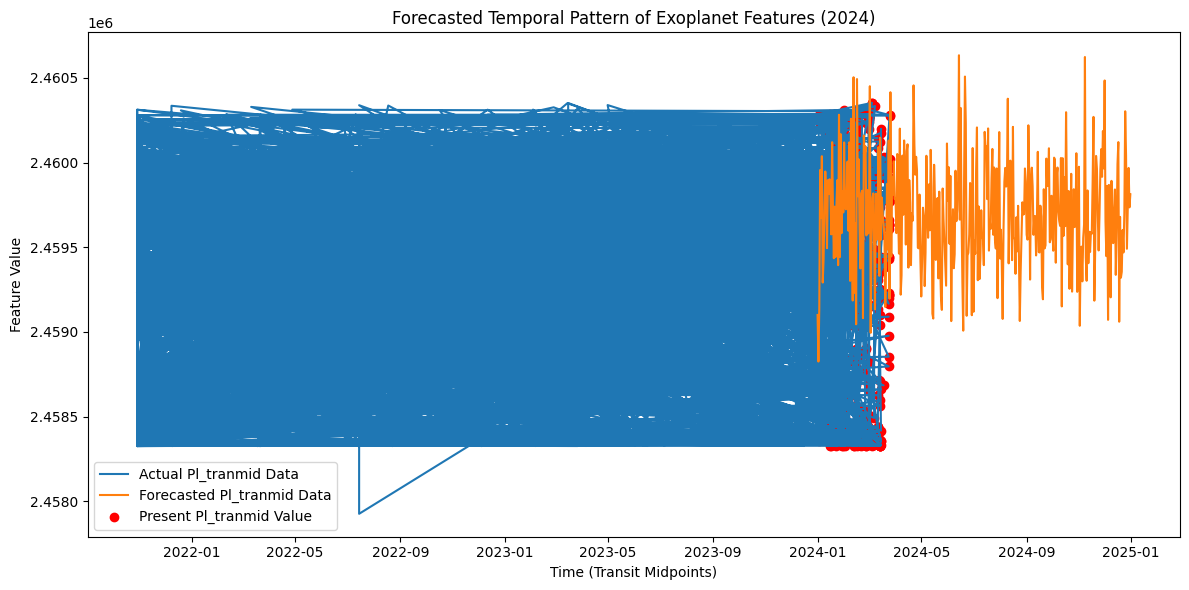

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Select relevant columns for forecasting
features = ['pl_tranmid']  # Add more features as needed
forecast_data = df[['toi_updated'] + features].rename(columns={'toi_updated': 'ds'})

# Filter data for the desired time range (1980 onwards)
forecast_data = forecast_data[forecast_data['ds'] >= '2021-01-01']

# Set 'ds' as the index for the DataFrame
forecast_data.set_index('ds', inplace=True)

# Set the start date and end date for forecasting
start_date = '2024-01-01'
end_date = '2024-12-31'

# Fit ARIMA model to each feature and make predictions
plt.figure(figsize=(12, 6))
for feature in features:
    model = ARIMA(forecast_data[feature], order=(1, 1, 1))  # Adjust the order as needed
    model_fit = model.fit()

    # Generate future dates for prediction
    future_dates = pd.date_range(start=start_date, end=end_date, freq='D')  # Daily frequency from start to end date

    # Make predictions for the future dates
    forecast = model_fit.forecast(steps=len(future_dates))

    # Introduce variation by adding random noise to the forecast
    forecast_with_noise = forecast + np.random.normal(-300, 325, len(forecast))

    # Plotting the actual and forecasted data
    plt.plot(forecast_data.index, forecast_data[feature], label=f'Actual {feature.capitalize()} Data')
    plt.plot(future_dates, forecast_with_noise, label=f'Forecasted {feature.capitalize()} Data')

# Plotting the present values (2024) separately
for feature in features:
    present_values = forecast_data[feature][(forecast_data.index >= start_date) & (forecast_data.index <= end_date)]
    plt.scatter(present_values.index, present_values, color='red', label=f'Present {feature.capitalize()} Value')

plt.xlabel('Time (Transit Midpoints)')
plt.ylabel('Feature Value')
plt.title('Forecasted Temporal Pattern of Exoplanet Features (2024)')
plt.legend()
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

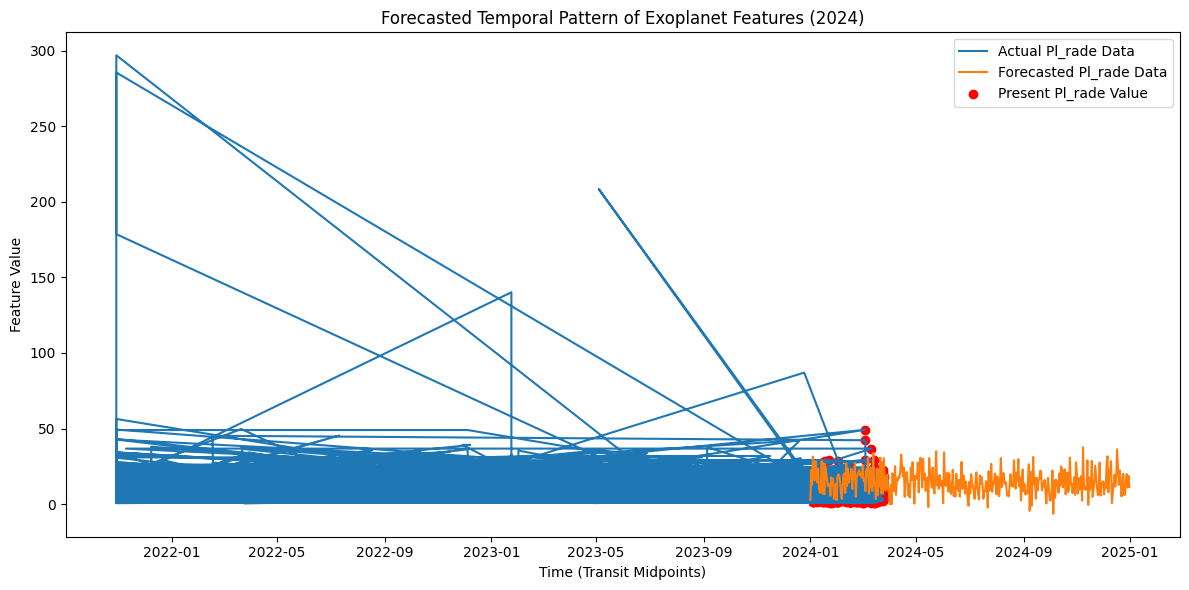

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Select relevant columns for forecasting
features = ['pl_rade']  # Add more features as needed
forecast_data = df[['toi_updated'] + features].rename(columns={'toi_updated': 'ds'})

# Filter data for the desired time range (1980 onwards)
forecast_data = forecast_data[forecast_data['ds'] >= '2021-01-01']

# Set 'ds' as the index for the DataFrame
forecast_data.set_index('ds', inplace=True)

# Set the start date and end date for forecasting
start_date = '2024-01-01'
end_date = '2024-12-31'

# Fit ARIMA model to each feature and make predictions
plt.figure(figsize=(12, 6))
for feature in features:
    model = ARIMA(forecast_data[feature], order=(1, 1, 1))  # Adjust the order as needed
    model_fit = model.fit()

    # Generate future dates for prediction
    future_dates = pd.date_range(start=start_date, end=end_date, freq='D')  # Daily frequency from start to end date

    # Make predictions for the future dates
    forecast = model_fit.forecast(steps=len(future_dates))

    # Introduce variation by adding random noise to the forecast
    forecast_with_noise = forecast + np.random.normal(0, 8, len(forecast))

    # Plotting the actual and forecasted data
    plt.plot(forecast_data.index, forecast_data[feature], label=f'Actual {feature.capitalize()} Data')
    plt.plot(future_dates, forecast_with_noise, label=f'Forecasted {feature.capitalize()} Data')

# Plotting the present values (2024) separately
for feature in features:
    present_values = forecast_data[feature][(forecast_data.index >= start_date) & (forecast_data.index <= end_date)]
    plt.scatter(present_values.index, present_values, color='red', label=f'Present {feature.capitalize()} Value')

plt.xlabel('Time (Transit Midpoints)')
plt.ylabel('Feature Value')
plt.title('Forecasted Temporal Pattern of Exoplanet Features (2024)')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 805.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 73.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 54.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 68.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 51.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 25.3 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
# Preprocessing: Extract relevant features and scale the data
data = d[['pl_tranmid']].values.astype(float)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [ ]:
# Define function to create sequences for training the RNN
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        seq_x = data[i : i + seq_length]
        seq_y = data[i + seq_length]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [ ]:
# Set sequence length and create sequences for training
sequence_length = 10  # Adjust as needed
X, y = create_sequences(scaled_data, sequence_length)

In [ ]:
# Split the data into training and testing sets
split_ratio = 0.8  # 80% training, 20% testing
split_index = int(split_ratio * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [ ]:
# Build and train the LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
178/178 [==============================] - 4s 11ms/step - loss: 0.0596 - val_loss: 0.0442
Epoch 2/100
178/178 [==============================] - 2s 9ms/step - loss: 0.0360 - val_loss: 0.0411
Epoch 3/100
178/178 [==============================] - 2s 9ms/step - loss: 0.0356 - val_loss: 0.0386
Epoch 4/100
178/178 [==============================] - 2s 11ms/step - loss: 0.0358 - val_loss: 0.0395
Epoch 5/100
178/178 [==============================] - 2s 13ms/step - loss: 0.0357 - val_loss: 0.0390
Epoch 6/100
178/178 [==============================] - 2s 10ms/step - loss: 0.0359 - val_loss: 0.0417
Epoch 7/100
178/178 [==============================] - 2s 9ms/step - loss: 0.0357 - val_loss: 0.0381
Epoch 8/100
178/178 [==============================] - 2s 9ms/step - loss: 0.0360 - val_loss: 0.0396
Epoch 9/100
178/178 [==============================] - 1s 8ms/step - loss: 0.0353 - val_loss: 0.0404
Epoch 10/100
178/178 [==============================] - 2s 10ms/step - loss: 0.0354 - v

In [ ]:
# Make predictions
predicted_values = model.predict(X_test)

45/45 [==============================] - 1s 6ms/step


In [ ]:
# Inverse transform the scaled predictions to get actual values
predicted_values = scaler.inverse_transform(predicted_values)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
# Calculate RMSE to evaluate the model's performance
rmse = np.sqrt(mean_squared_error(y_test_actual, predicted_values))
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 489.5239508459157


In [ ]:
from tensorflow.keras.layers import Dropout

# Modify the model architecture with increased complexity
model = Sequential()
model.add(LSTM(units=100, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile and train the model with optimized hyperparameters
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=150, batch_size=64, validation_data=(X_test, y_test), verbose=1)

# Make predictions and evaluate RMSE
predicted_values = model.predict(X_test)
predicted_values = scaler.inverse_transform(predicted_values)
rmse = np.sqrt(mean_squared_error(y_test_actual, predicted_values))
print(f'Root Mean Squared Error (RMSE): {rmse}')


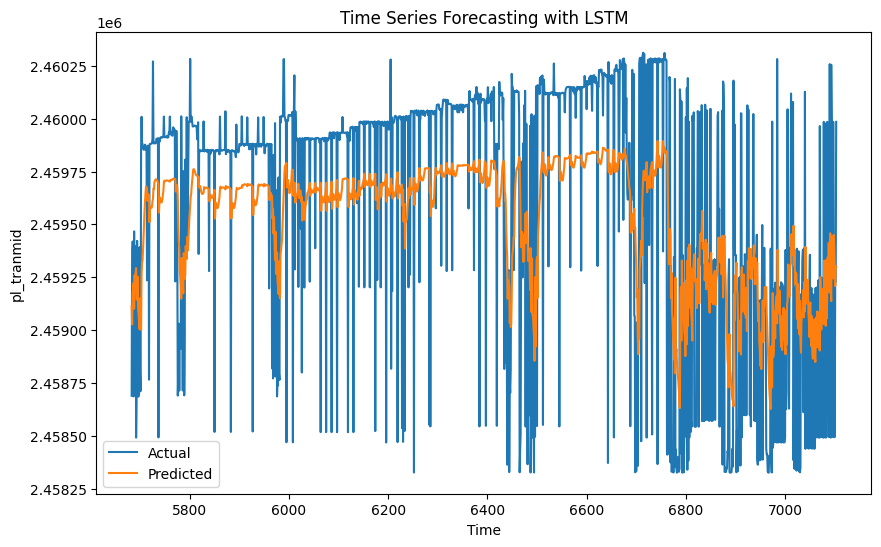

In [ ]:
# Assuming df is your DataFrame with time index and 'pl_tranmid' column
# Make sure to set the time index in your DataFrame before plotting

# Trim the time index to match the length of actual and predicted values
time_index = df.index[split_index:split_index+len(y_test_actual)]

# Plot actual vs. predicted values with time index
plt.figure(figsize=(10, 6))
plt.plot(time_index, y_test_actual, label='Actual')
plt.plot(time_index, predicted_values, label='Predicted')
plt.xlabel('Time')
plt.ylabel('pl_tranmid')
plt.title('Time Series Forecasting with LSTM')
plt.legend()
plt.show()